In [1]:
from toroidalFilament_dir.DxDz import cal_newton_DxDz as cal_DxDz
import toroidalFilament_dir.geometry_TT1
from toroidalFilament_dir.geometry_TT1 import coil_angle_dict, R0, R, mu
from toroidalFilament_dir.signal_strength import cal_signal, coil_signal
from process_probe_data import *

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
import scipy as sc

presentation_path = r"C:\Users\pitit\Documents\01_MUIC_work\ICPY 441 Senior project\meetings\specialFilamentMeeting"

# Realtionship of $\Delta_{||} \sim \Delta_x$ and $\Delta_\perp \sim \Delta_z$

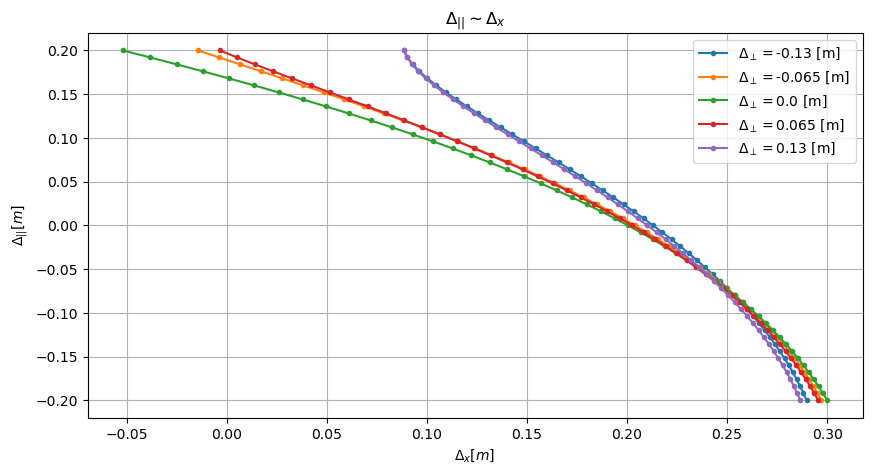

In [4]:
#define plot
fig, ax = plt.subplots(1,figsize = (10,5))

#define shift values
x_lower_lim, x_upper_lim = -0.2,0.2
z_lower_lim, z_upper_lim = -0.13,0.13
x_shift = np.linspace(x_lower_lim,x_upper_lim,51)
z_shift = np.linspace(z_lower_lim,z_upper_lim,5)

#define probes to be used
use_probe = [coil_angle_dict[1],coil_angle_dict[2],coil_angle_dict[7],coil_angle_dict[8]]

#calculate Dx & Dz
for z in z_shift:
    Dx_arr = []
    for x in x_shift:
        signal = cal_signal(x,z,use_probe)
        Dx, _ = cal_DxDz(signal,use_probe)

        Dx_arr.append(Dx)

    ax.plot(Dx_arr, x_shift,".-",label = r"$\Delta_\perp = $" + f"{z} [m]")

ax.set_title(r"$\Delta_{||} \sim \Delta_x$")
ax.set_xlabel(r"$\Delta_x [m]$")
ax.set_ylabel(r"$\Delta_{||} [m]$")
ax.grid()
ax.legend()

plt.savefig(presentation_path + "xRelation")

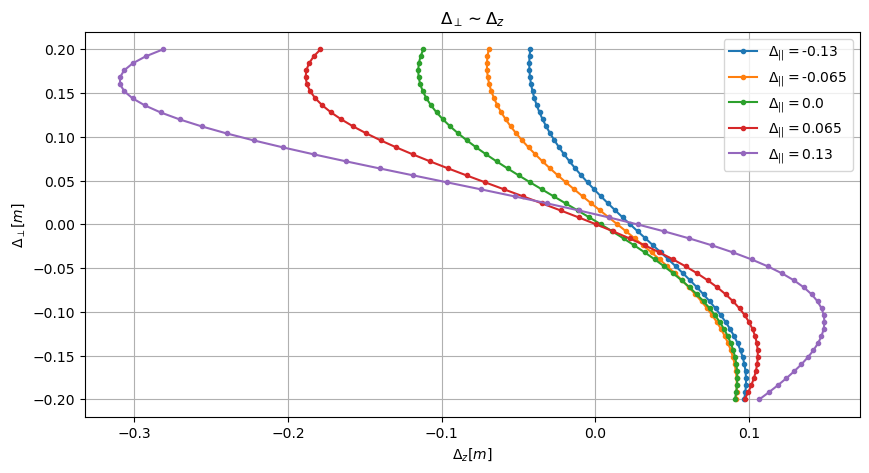

In [6]:
#define plot
fig, ax = plt.subplots(1,figsize = (10,5))

#define shift values
x_lower_lim, x_upper_lim = -0.13,0.13
z_lower_lim, z_upper_lim = -0.2,0.2
x_shift = np.linspace(x_lower_lim,x_upper_lim,5)
z_shift = np.linspace(z_lower_lim,z_upper_lim,51)

#define probes to be used
use_probe = [coil_angle_dict[1],coil_angle_dict[2],coil_angle_dict[7],coil_angle_dict[8]]

#calculate Dx & Dz
for x in x_shift:
    Dz_arr = []
    for z in z_shift:
        signal = cal_signal(x,z,use_probe)
        _, Dz = cal_DxDz(signal,use_probe)

        Dz_arr.append(Dz)

    ax.plot(Dz_arr, z_shift,".-",label = r"$\Delta_{||} = $" + f"{x}")

ax.set_title(r"$\Delta_\perp \sim \Delta_z$")
ax.set_xlabel(r"$\Delta_z [m]$")
ax.set_ylabel(r"$\Delta_\perp [m]$")
ax.grid()
ax.legend()

plt.savefig(presentation_path + "zRelation")


## Reasons to bound shift value

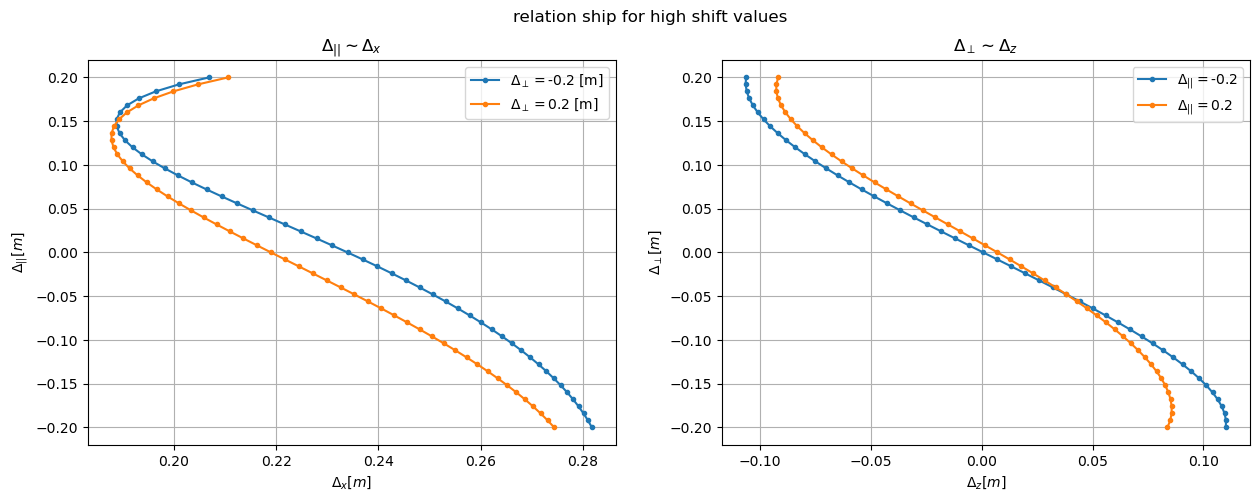

In [9]:
#define plot
fig, ax = plt.subplots(1,2,figsize = (15,5))
fig.suptitle("relation ship for high shift values")

#define shift values
x_lower_lim, x_upper_lim = -0.2,0.2
z_lower_lim, z_upper_lim = -0.2,0.2
x_shift = np.linspace(x_lower_lim,x_upper_lim,51)
z_shift = np.linspace(z_lower_lim,z_upper_lim,2)

#define probes to be used
use_probe = [coil_angle_dict[1],coil_angle_dict[4],coil_angle_dict[7],coil_angle_dict[10]]

#calculate Dx & Dz
for z in z_shift:
    Dx_arr = []
    for x in x_shift:
        signal = cal_signal(x,z,use_probe)
        Dx, _ = cal_DxDz(signal,use_probe)

        Dx_arr.append(Dx)

    ax[0].plot(Dx_arr, x_shift,".-",label = r"$\Delta_\perp = $" + f"{z} [m]")

ax[0].set_title(r"$\Delta_{||} \sim \Delta_x$")
ax[0].set_xlabel(r"$\Delta_x [m]$")
ax[0].set_ylabel(r"$\Delta_{||} [m]$")
ax[0].grid()
ax[0].legend()


#define shift values
x_lower_lim, x_upper_lim = -0.2,0.2
z_lower_lim, z_upper_lim = -0.2,0.2
x_shift = np.linspace(x_lower_lim,x_upper_lim,2)
z_shift = np.linspace(z_lower_lim,z_upper_lim,51)

#define probes to be used
use_probe = [coil_angle_dict[1],coil_angle_dict[4],coil_angle_dict[7],coil_angle_dict[10]]

#calculate Dx & Dz
for x in x_shift:
    Dz_arr = []
    for z in z_shift:
        signal = cal_signal(x,z,use_probe)
        _, Dz = cal_DxDz(signal,use_probe)

        Dz_arr.append(Dz)

    ax[1].plot(Dz_arr, z_shift,".-",label = r"$\Delta_{||} = $" + f"{x}")

ax[1].set_title(r"$\Delta_\perp \sim \Delta_z$")
ax[1].set_xlabel(r"$\Delta_z [m]$")
ax[1].set_ylabel(r"$\Delta_\perp [m]$")
ax[1].grid()
ax[1].legend()

plt.savefig(presentation_path + "RelationLimit")

# Signal difference between experiment and simulation

In [10]:
#retreive processed data
shot_no = 966
recorded_plasma_current, recorded_time, discharge_begin, discharge_end = retreive_plasma_current(shot_no)
recorded_magnetic_signal = retreive_magnetic_signal(shot_no)

time, plasma_current, plasma_signal = trim_quantities(recorded_time,recorded_magnetic_signal,recorded_plasma_current,discharge_begin,discharge_end)

In [22]:
num_indices = 50

time_ax = plasma_signal[:num_indices].iloc[:,0]

#simulate signal with no shift
simulate_signal = pd.DataFrame(columns = plasma_signal.columns)
for t, Ip in zip(time_ax, plasma_current.to_numpy()):
    signal_lst = []
    for probe_num in range(1,13):
        phi = coil_angle_dict[probe_num]
        r = R0 + R * np.cos(phi)
        z = R * np.sin(phi) - 0
        signal_lst.append(coil_signal(phi,r,z,R0,Ip))

    new_row = [t] + signal_lst
    simulate_signal.loc[len(simulate_signal)] = new_row

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_81632\1371046955.py:16: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  fig.legend(l1,l2,labels = ["measured", "siumulated"],loc = "upper center",bbox_to_anchor = (0.5,0.95))


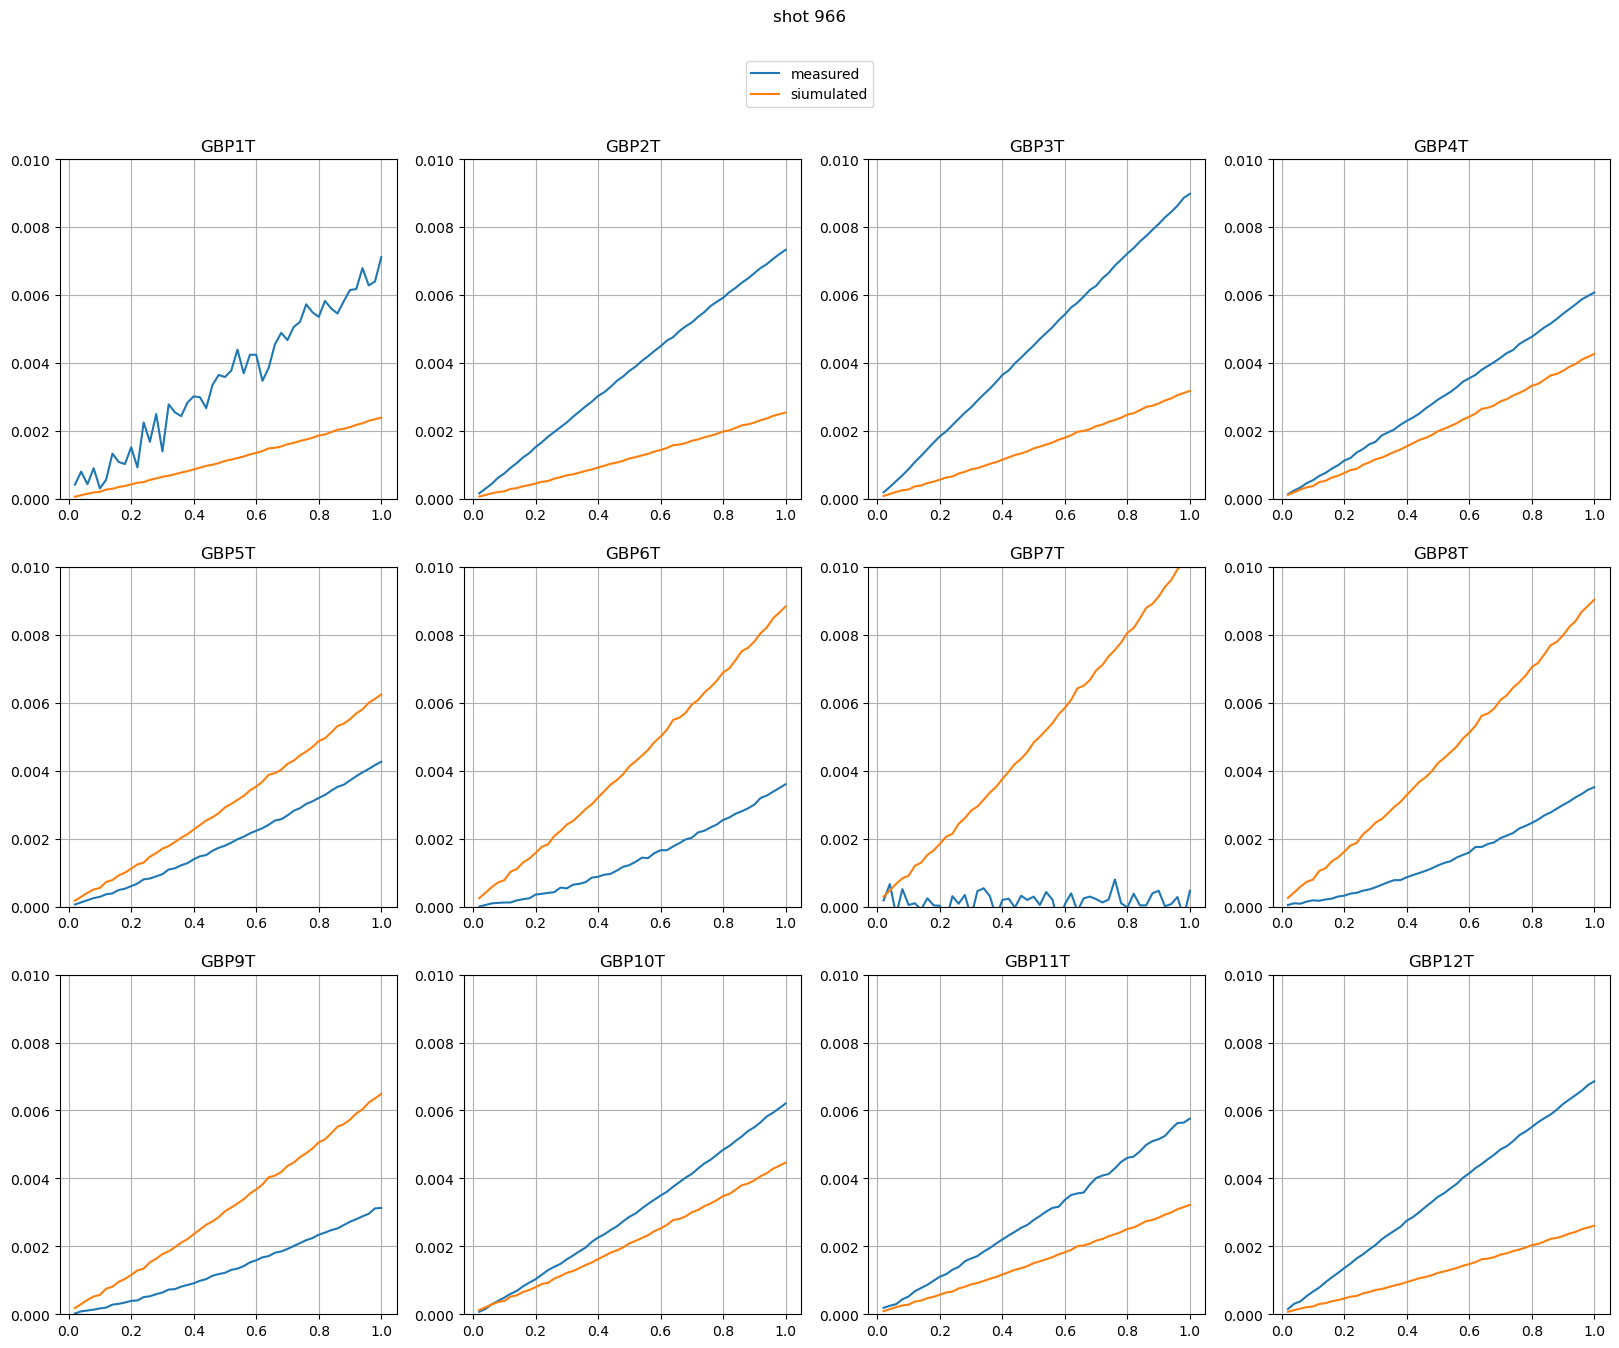

In [39]:
fig, axs = plt.subplots(3,4, figsize = (20,15))
fig.suptitle(f"shot {shot_no}")

probe_num = 1
for row in range(axs.shape[0]):

    for column in range(axs.shape[1]):
        l1 = axs[row,column].plot(time_ax,plasma_signal[:num_indices].iloc[:,probe_num])
        l2 = axs[row,column].plot(time_ax,simulate_signal[:num_indices].iloc[:,probe_num])
        axs[row, column].set_title(f"GBP{probe_num}T")
        axs[row,column].grid()
        axs[row,column].set_ylim(0,0.01)

        probe_num += 1

fig.legend(l1,l2,labels = ["measured", "siumulated"],loc = "upper center",bbox_to_anchor = (0.5,0.95))

## Simulated signal

### Signal with orientation

In [13]:
def raw_coil_signal(phi:np.float64, r:float, z:float, a_f:float,I = 1E3):
    """
    simulate magnetic magnitude at each coils in cylindrical coordinate

    Parameters:
    phi (float): angle between the positive x-axis and radial vector of the coil location in radian
    r (float) : radial distance from center of reactor to coil in meters
    z (float) : vertical distance from center of reactor to coil in meters
    a_f (float) : plasma radius in meters

    Returns:
    float: simulated magnetic signal at each coils
    """
    if None in (phi,r,z,a_f) or np.inf in (phi,r,z,a_f):
        raise ValueError(f"Nan or inf is contained in [phi,r,z,a_f] = {[phi,r,z,a_f]}")
    if a_f < 0:
        raise ValueError("a_f is negative")

    k = np.sqrt(4 * a_f * r / ((a_f + r) ** 2 + z ** 2))
    K, E = sc.special.ellipk(k ** 2), sc.special.ellipe(k ** 2)
    def b_r(r, z, a_f):  # calculate magnetic signal along radial direction with elliptic integrals
        return mu * I / 2 / np.pi * z / r / np.sqrt((a_f + r) ** 2 + z ** 2) * (
                -K + E * (a_f ** 2 + r ** 2 + z ** 2) / ((a_f - r) ** 2 + z ** 2)
                )

    def b_z(r, z, a_f):  # calculate magnetic signal along z direction with elliptic integrals
        return mu * I / 2 / np.pi * 1 / np.sqrt((a_f + r) ** 2 + z ** 2) * (
                K + E * (a_f ** 2 - r ** 2 - z ** 2) / ((a_f - r) ** 2 + z ** 2)
                )

    return b_r(r,z,a_f), b_z(r,z,a_f), np.sqrt(b_r(r, z, a_f)**2 + b_z(r, z, a_f)**2)

#calculate signal with probe orientation
def signal_simulation(x_shift, z_shift):
    signal_lst = []
    for probe_num in range(1,13):
        phi = coil_angle_dict[probe_num]
        r = R0 + R * np.cos(phi)
        z = R * np.sin(phi) - z_shift
        a_f = R0 + x_shift
        signal_lst.append(coil_signal(phi,r,z,a_f,1000))
    return signal_lst

#calculate b_r, b_z, and signal without orientation
def raw_signal_simulation(x_shift, z_shift):
    b_r_lst,b_z_lst,signal_lst = [], [], []
    for probe_num in range(1,13):
        phi = coil_angle_dict[probe_num]
        r = R0 + R * np.cos(phi)
        z = R * np.sin(phi) - z_shift
        a_f = R0 + x_shift
        b_r, b_z, signal = raw_coil_signal(phi,r,z,a_f,1000)

        b_r_lst.append(b_r)
        b_z_lst.append(b_z)
        signal_lst.append(signal)
    return b_r_lst,b_z_lst,signal_lst


In [14]:
save_path = r"C:\Users\pitit\Documents\02_MUIC_programming\ICPY_441_Senior_project_in_physics\plasmaColumnPosition\resources\result\signalSimulation"

x_range = np.arange(-R,R+0.05,0.05)
z_shift = 0

count = 1
for x_shift in x_range: 
    probe_numbers = [f"IGB{i}T" for i in range(1,13)]

    #magnetic vector at each probe and signal magnitude
    br_lst, bz_lst, raw_signal = raw_signal_simulation(x_shift,z_shift)
    #signal with orientation
    signal = signal_simulation(x_shift,z_shift)

    fig, ax = plt.subplots(3,figsize = (10,15))
    fig.suptitle(r"($\Delta_{||}, \Delta_\perp$) = " + f"{round(x_shift,4), round(z_shift,4)}")

    circle1 = Circle((R0,z_shift),radius = R, fill = False, color = "black")
    circle2 = Circle((-R0,z_shift),radius = R, fill = False, color = "black")

    #probes on circle
    # Define the center and radius of circle1
    center_x = R0
    center_z = 0
    angles_deg = np.arange(0, 360, 30)  # from 0 to 330 degrees in steps of 30
    angles_rad = np.deg2rad(angles_deg)  # convert to radians

    # Compute x and z coordinates of the points on the circle
    x_points = center_x + R * np.cos(angles_rad)
    z_points = center_z + R * np.sin(angles_rad)

    ax[0].add_patch(circle1)
    ax[0].add_patch(circle2)
    ax[0].scatter(x_points, z_points, color='red',marker = "s")  # You can change color or marker as needed
    ax[0].scatter(R0+x_shift,z_shift)
    ax[0].scatter(-(R0+x_shift),z_shift)
    ax[0].set_xlim(-1,1)
    ax[0].set_ylim(-0.4,0.4)
    ax[0].set_title("plasma position with probes")
    ax[0].set_xlabel("r [m]")
    ax[0].set_ylabel("z [m]")
    ax[0].grid()

    #plot magnetic field vector
    for index in range(len(x_points)):
        x_origin, z_origin = x_points[index], z_points[index]
        vx, vz = br_lst[index], bz_lst[index]

        magnitude = np.sqrt(vx**2 + vz**2)
        normalizng_factor = 1E-1/magnitude
        vx,vz = vx*normalizng_factor, vz*normalizng_factor
        ax[0].quiver(
            x_origin, z_origin, vx, vz,
            magnitude,  # This controls the color
            angles="xy", scale_units="xy", scale=1,
            cmap='plasma'  # Choose any matplotlib colormap
        )


    ax[1].bar(probe_numbers,raw_signal,color = "gray")
    ax[1].set_title("signal at each magnetic probes not considering probe orientation")
    ax[1].set_xlabel("probe number")
    ax[1].set_ylabel("signal [T]")
    ax[1].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    ax[1].set_ylim(0,2e-3)
    ax[1].grid()

    ax[2].bar(probe_numbers,signal,color = "gray")
    ax[2].set_title("signal at each magnetic probes considering probe orientation")
    ax[2].set_xlabel("probe number")
    ax[2].set_ylabel("signal [T]")
    ax[2].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    ax[2].set_ylim(0,2e-3)
    ax[2].grid()

    save_name = save_path + f"\\{count}"
    count += 1
    plt.savefig(save_name)
    plt.clf()


<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>